# Transfer Learning:
  - Fine-tune a pre-trained model on a new dataset.
  - Use a pre-trained model as a feature extractor.
  - Use a pre-trained model as a starting point for a new model.
  


**Import libraries:**

In [11]:
#Import the libraries:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
#Import the dataset:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
#Normalize the data and used the one_hot labels:
X_train, X_test = X_train/255.0, X_test/255.0
#Transfer the classes of dataset:
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1112s 7us/step


# Data Augmentation:

Data augmentation is a technique used in machine learning to increase the diversity and training data without
actually collecting more data. It involves applying random transformations to the existing data to create
new, synthetic data that is similar to the original data.
- For Image data augmentation technique might include rotation, scaling , flipping, copying and adding noise
- For Text data augmentation technique might include tokenization, stemming, lemmatization, and word
substitution.
- For Audio data augmentation technique might include time stretching, pitch shifting, and adding noise.

**Data Augmentation Beneficial for sevral Reasons**
1.  **Prevents Overfitting**: Data augmentation can help prevent overfitting by increasing
the size of the training dataset and reducing the likelihood of the model memorizing the training data.
2.  **Improves Generalization**: Data augmentation can improve the generalization of the model by
allowing it to learn from a more diverse set of data.
3.  **Reduces the Need for Large Datasets**: Data augmentation can reduce the need for
large datasets by allowing the model to learn from a smaller set of data.
4.  **Increases Model Robustness**: Data augmentation can increase the robustness of the model
by allowing it to learn from a more diverse set of data.
**Data Augmentation Techniques**
1.  **Rotation**: Rotate the image by a random angle between -30 and 30 degrees
2.  **Scaling**: Scale the image by a random factor between 0.8 and
1.2
3.  **Flipping**: Flip the image horizontally or vertically
4.  **Copying**: Copy the image and apply a random transformation to it
5.  **Adding Noise**: Add random noise to the image




## Data Preprocessing:
- The data is preprocessed by removing the unnecessary columns and converting the categorical variables into numerical variables using Label
- Since MobileNetV2 expects size of images 224x224 and CIFAR-10 have images 32x32. So, we need to resize them 
and data augmentation is applied

In [7]:
# Data Augmentation using Image generator:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    zca_whitening = False,
    vertical_flip=False
) 

datagen.fit(X_train)

# Modify Pre-Trained Model:
We load the MobileNetV12 without its top layer , Since we are applying this on new task with 10 classes instead of 
1000 , we add the new classifier on top, and freeze the layers of MobileNetV12.

In [17]:
#Now we Modify the dataset:
#Load the dataset:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
#Freeze the Model:
base_model.trainable = False
#Add a new classification head:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
#Now Define the Model:
model = Model(inputs=base_model.input, outputs=predictions)

C:\Users\Al Hafiz Enterprises\AppData\Local\Temp\ipykernel_12616\4202958469.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [18]:
#Complie and Train the Model:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy", metrics=['accuracy'])
# Calculate steps_per_epoch as an integer
steps_per_epoch = len(X_train) // 32  # Use floor division (//)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    steps_per_epoch=steps_per_epoch, epochs=10, 
                    validation_data=(X_test, y_test), verbose=1)
#history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
  #                  steps_per_epoch=len(X_train)/32, epochs=10, 
    #                validation_data=(X_test, y_test), verbose=1)


Epoch 1/10


c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 311s 177ms/step - accuracy: 0.2601 - loss: 2.0116 - val_accuracy: 0.3170 - val_loss: 1.8842
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:06 81ms/step - accuracy: 0.3438 - loss: 1.6666

c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3438 - loss: 1.6666 - val_accuracy: 0.3209 - val_loss: 1.8811
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 245s 157ms/step - accuracy: 0.3111 - loss: 1.8870 - val_accuracy: 0.3366 - val_loss: 1.8428
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4688 - loss: 1.6887 - val_accuracy: 0.3374 - val_loss: 1.8430
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - accuracy: 0.3165 - loss: 1.8742 - val_accuracy: 0.3399 - val_loss: 1.8250
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.2812 - loss: 1.8992 - val_accuracy: 0.3391 - val_loss: 1.8256
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 231s 147ms/step - accuracy: 0.3242 - loss: 1.8492 - val_accuracy: 0.3439 - val_loss: 1.8166
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2500 - loss: 1.9003 - val_accuracy: 0.3423 - val_loss: 1.8162
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1169s 748ms/step - accuracy: 0.3276 - l

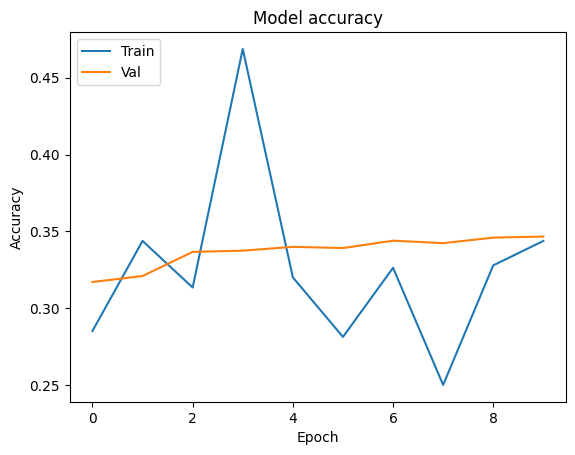

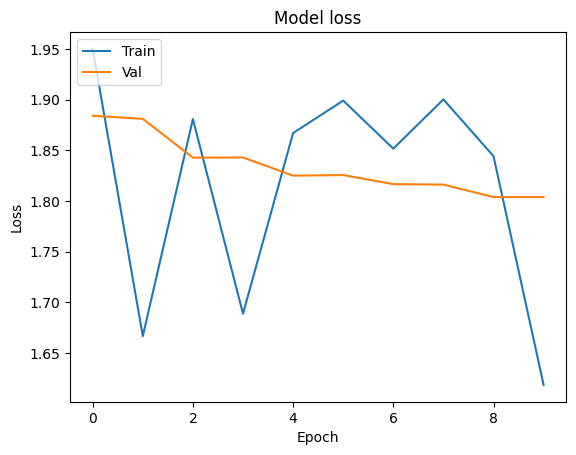

In [19]:
#Plot the model:
import matplotlib.pyplot as plt
#Plot the train and validation accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot the training and validation loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Fine Tuning of Models:

In [31]:
#Now fine tune the Model:
base_model.trainable =True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


# Recompile the Model:
#Complie and Train the Model:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy", metrics=['accuracy'])
steps_per_epoch = len(X_train) // 32  # Use floor divi-sion (//)

history_fin = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    steps_per_epoch=steps_per_epoch, epochs=10, 
                    validation_data=(X_test, y_test), verbose=1)
    

Epoch 1/10


c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 625s 344ms/step - accuracy: 0.5982 - loss: 1.1485 - val_accuracy: 0.6511 - val_loss: 1.0331
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 7:22 284ms/step - accuracy: 0.6250 - loss: 1.1508

c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6250 - loss: 1.1508 - val_accuracy: 0.6501 - val_loss: 1.0337
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 429s 274ms/step - accuracy: 0.6186 - loss: 1.0952 - val_accuracy: 0.6616 - val_loss: 0.9977
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7188 - loss: 0.8817 - val_accuracy: 0.6611 - val_loss: 0.9984
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 423s 271ms/step - accuracy: 0.6254 - loss: 1.0730 - val_accuracy: 0.6793 - val_loss: 0.9254
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6875 - loss: 0.9848 - val_accuracy: 0.6796 - val_loss: 0.9264
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 420s 269ms/step - accuracy: 0.6359 - loss: 1.0463 - val_accuracy: 0.6855 - val_loss: 0.9369
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5625 - loss: 0.9974 - val_accuracy: 0.6858 - val_loss: 0.9375
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 397s 254ms/step - accuracy: 0.6480 - lo

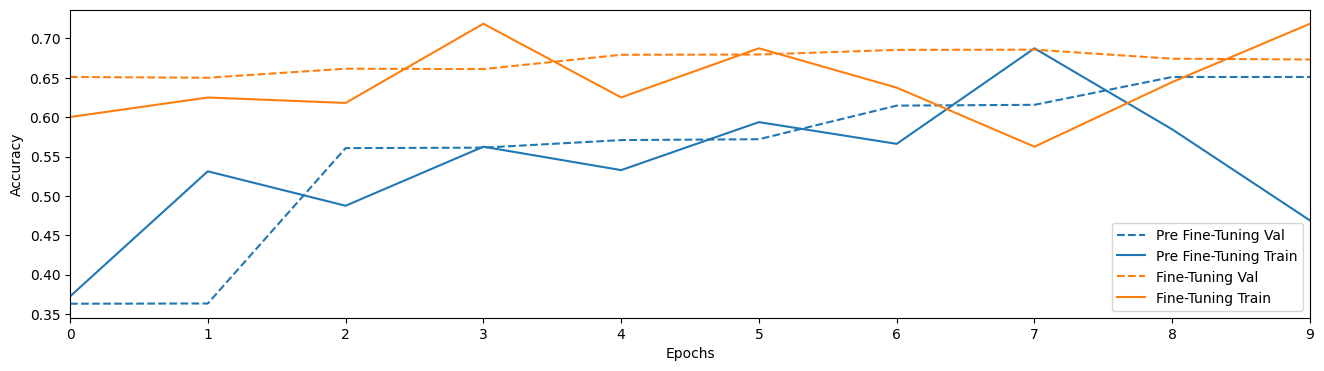

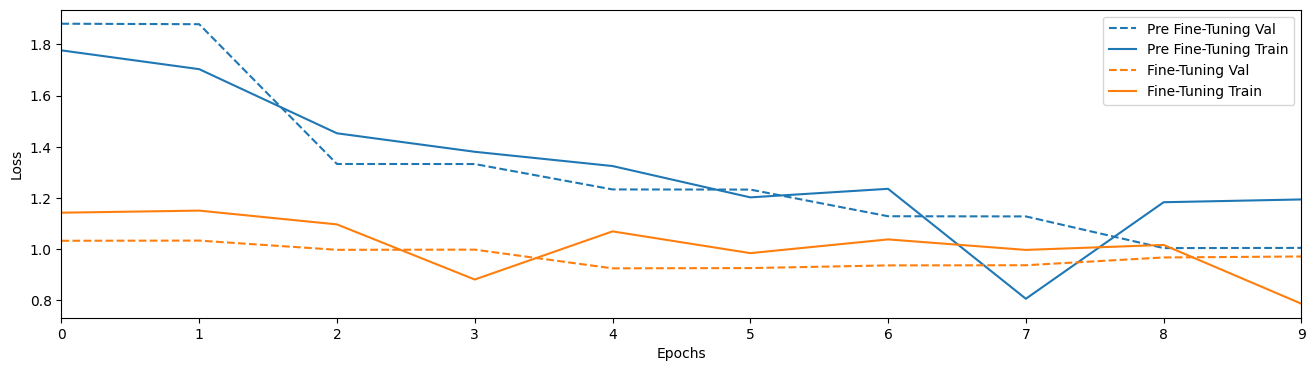

In [32]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 4))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot accuracy
plot_history([('Pre Fine-Tuning', history),
              ('Fine-Tuning', history_fin)],
             key='accuracy')

# Plot loss
plot_history([('Pre Fine-Tuning', history),
              ('Fine-Tuning', history_fin)],
             key='loss')